In [888]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [967]:
df = pd.read_csv('/Users/gregorylontok/gd/LMU/fall2018-bi/lecture_material/data/universal_bank.csv')

In [890]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [891]:
# Set target variable
y = df['Personal Loan']

In [892]:
model_stats = {
    'model' : [],
    'accuracy' : []
}

# Logistic Regression

In [893]:
X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [894]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [895]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [896]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [897]:
logistic_regression_accuracy = metrics.accuracy_score(y_test, predictions)
model_stats['model'].append('Logistic Regression')
model_stats['accuracy'].append(logistic_regression_accuracy)
logistic_regression_accuracy

0.94

precision: ability of a classification model to return only relevant instances


recall: ability of a classification model to identify all relevant instances


F1 score: single metric that combines recall and precision using the harmonic mean


In [898]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       448
          1       0.84      0.52      0.64        52

avg / total       0.94      0.94      0.93       500



In [899]:
print(confusion_matrix(y_test, predictions))

[[443   5]
 [ 25  27]]


In [900]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(443, 5, 25, 27)

In [901]:
specificity = tn / (tn + fp)
specificity

0.9888392857142857

In [902]:
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,443,5,448
1,25,27,52
All,468,32,500



True positives: data points labeled as positive that are actually positive

---


False positives: data points labeled as positive that are actually negative

---


True negatives: data points labeled as negative that are actually negative

---


False negatives: data points labeled as negative that are actually positive

In [903]:
pd.DataFrame(model.coef_, index = ['Coef'], columns = X.columns).T

,Coef
Experience,-0.003860
Income,0.039105
Family,0.467588
Education,0.867527
Securities Account,-0.794491
CD Account,2.993677
Online,-0.481349
CreditCard,-0.979653


In [980]:
import statsmodels.api as sm

X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = sm.Logit(y_train, X_train).fit()
predictions = round(model.predict(X_test))

Optimization terminated successfully.
         Current function value: 0.270298
         Iterations 8


In [981]:
predictions[0:5]

1739    0.0
1374    0.0
546     0.0
617     0.0
1340    0.0
dtype: float64

In [976]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1992
Method:                           MLE   Df Model:                            7
Date:                Tue, 27 Nov 2018   Pseudo R-squ.:                  0.1711
Time:                        20:38:15   Log-Likelihood:                -555.13
converged:                       True   LL-Null:                       -669.72
                                        LLR p-value:                 7.451e-46
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Experience            -0.0612      0.007     -8.955      0.000      -0.075      -0.048
Income                 0.0139      0.001     10.232      0.000       0.011       0.017
Family                -0.3939      0.063     -6.212      0.000      -0.518      -0.270
Education             -0.2173      0.082     -2.665      0.008      -0.377      -0.057
Securities Account    -1.7411      0.334     -5.205      0.000      -2.397      -1.086
CD Account             4.4983      0.341     13.183      0.000       3.830       5.167
Online                -1.3275      0.165     -8.028      0.000      -1.652      -1.003
CreditCard            -1.7112      0.245     -6.993      0.000      -2.191      -1.232
======================================================================================
"""

In [982]:
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0,430,13,443
1,40,17,57
All,470,30,500


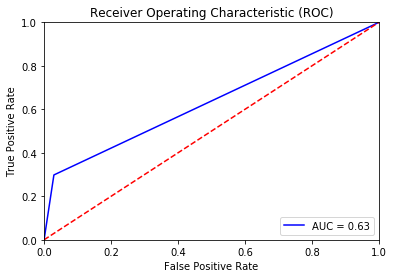

In [983]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

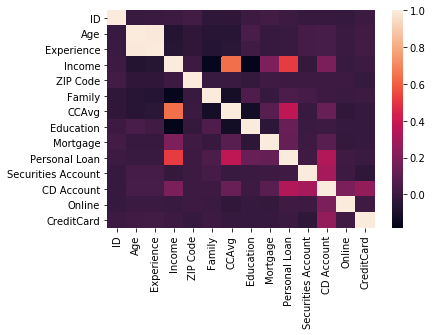

In [909]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# KNN

In [910]:
X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [911]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [912]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [913]:
predictions= model.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [914]:
knn_accuracy = metrics.accuracy_score(y_test, predictions)
model_stats['model'].append('KNN')
model_stats['accuracy'].append(knn_accuracy)
knn_accuracy

0.908

In [915]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       453
          1       0.51      0.40      0.45        47

avg / total       0.90      0.91      0.90       500



In [916]:
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,435,18,453
1,28,19,47
All,463,37,500


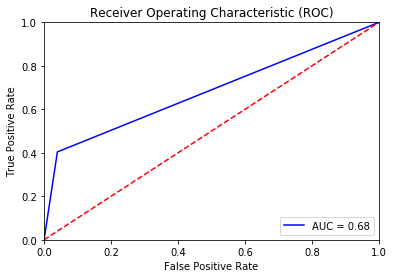

In [917]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Trees

In [918]:
X = df[['Education', 'Family', 'CD Account']]

In [919]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [920]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [921]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [922]:
decision_tree_accuracy = metrics.accuracy_score(y_test, predictions)
model_stats['model'].append('Decision Tree')
model_stats['accuracy'].append(decision_tree_accuracy)
decision_tree_accuracy

0.91

In [923]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.92      0.99      0.95       446
          1       0.74      0.26      0.38        54

avg / total       0.90      0.91      0.89       500



In [924]:
pd.crosstab(y_test, predictions, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,441,5,446
1,40,14,54
All,481,19,500


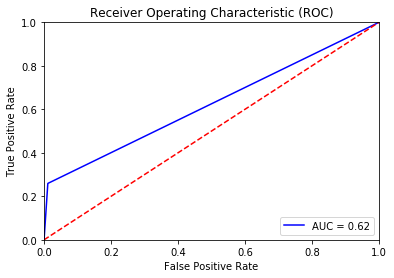

In [925]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [926]:
pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['Importance']).sort_values(['Importance'], ascending = False)

,Importance
CD Account,0.572555
Education,0.266630
Family,0.160815


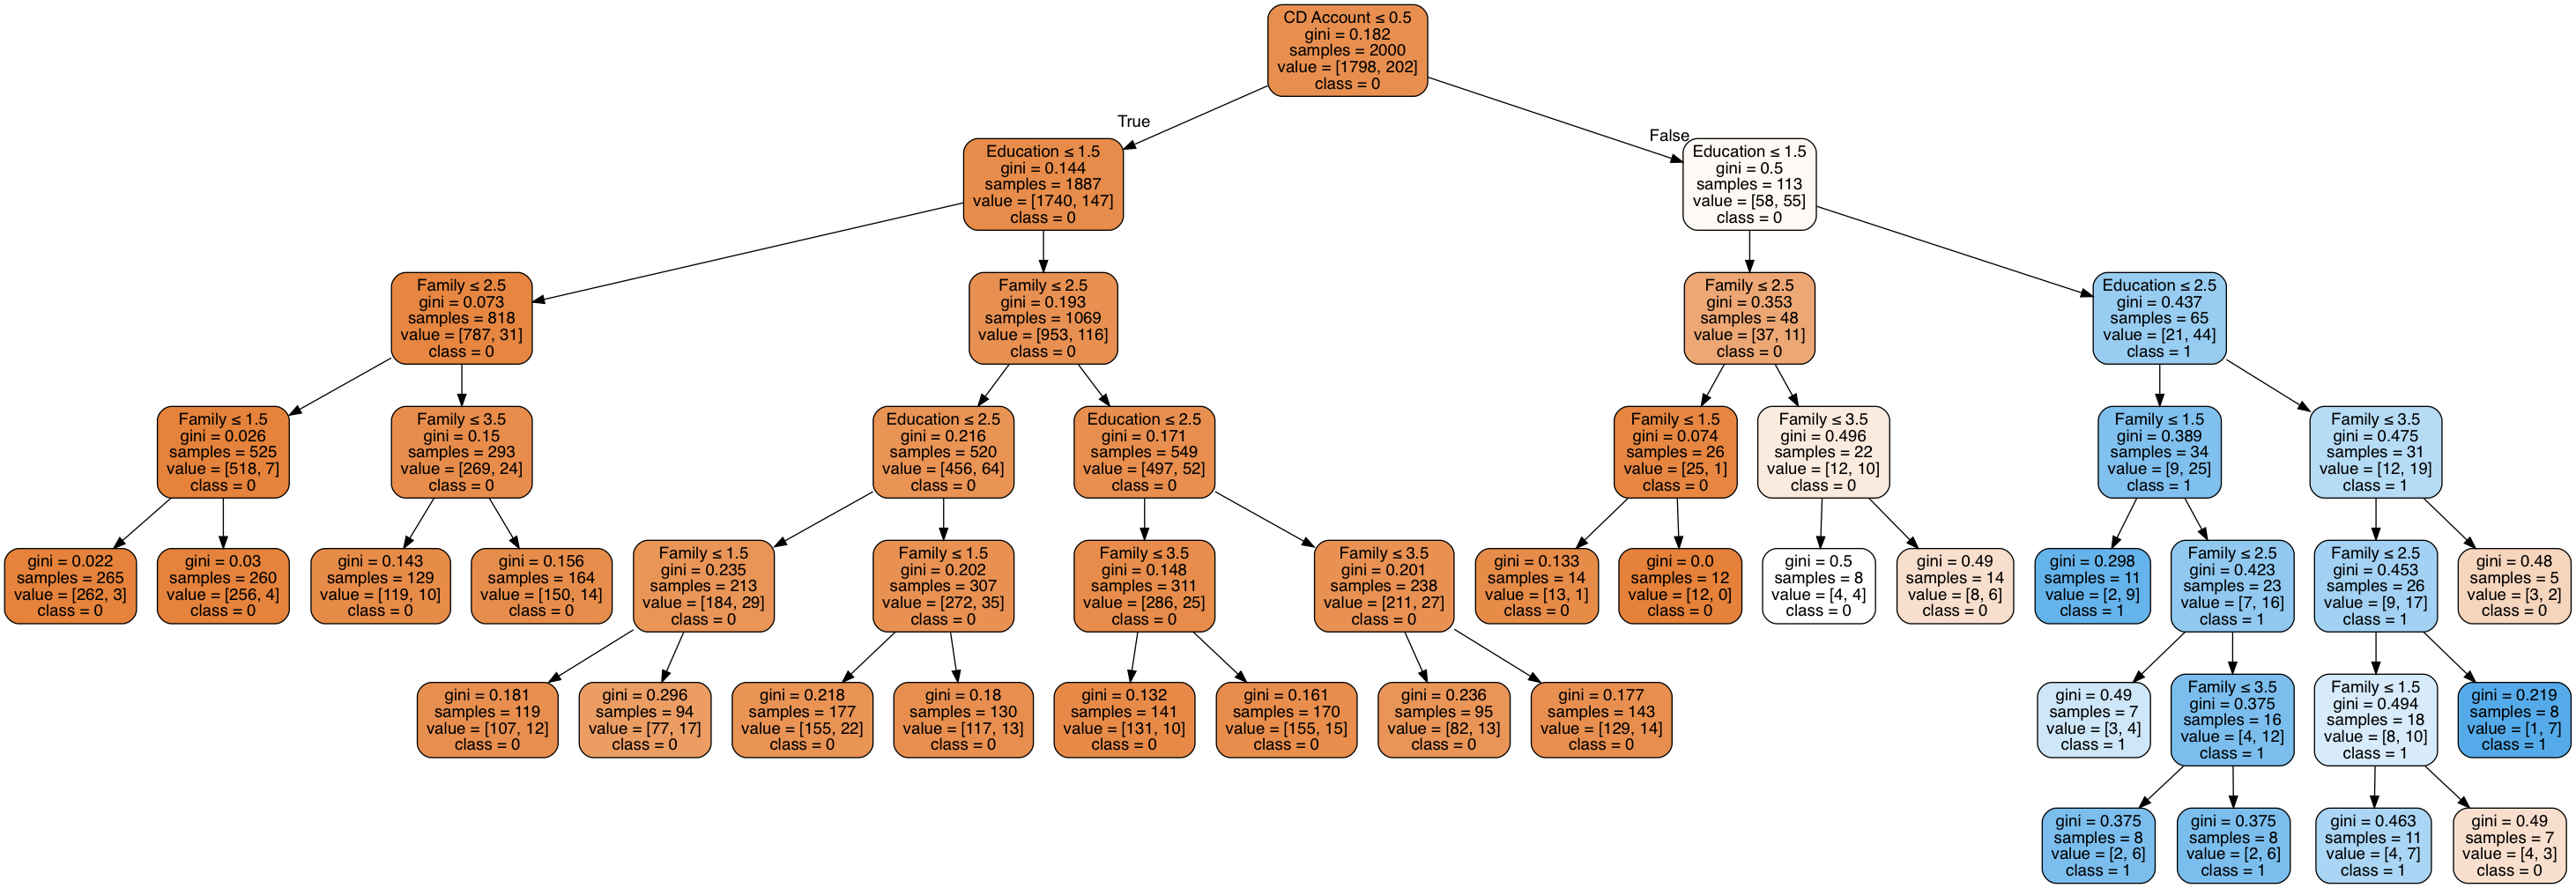

In [927]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

# only 1 tree in DecisionTreeClassifier
export_graphviz(model, out_file=dot_data,
                feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest

In [928]:
X = df[['Education', 'Family', 'CD Account']]

In [929]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [930]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [931]:
# X = df[['Education', 'Family', 'CD Account']]
#predictions = model.predict([[1, 1, 0]]) # ID 10 -> PL 0
#predictions = model.predict([[2, 1, 1]]) # ID 30 -> PL 1
#predictions = model.predict([[3, 4, 1]])
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [932]:
random_forest_accuracy = metrics.accuracy_score(y_test, predictions)
model_stats['model'].append('Random Forest')
model_stats['accuracy'].append(random_forest_accuracy)
random_forest_accuracy

0.916

In [933]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       453
          1       0.65      0.23      0.34        47

avg / total       0.90      0.92      0.90       500



In [934]:
pd.crosstab(y_test, predictions, rownames = ['Actual'], colnames = ['Predictions'], margins = True)

Predictions,0,1,All
Actual,,,
0,447,6,453
1,36,11,47
All,483,17,500


In [935]:
pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['Importance']).sort_values(['Importance'], ascending = False)

,Importance
CD Account,0.678166
Education,0.188382
Family,0.133452


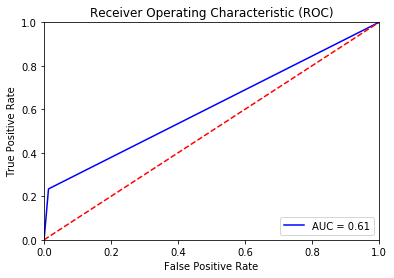

In [936]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [937]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Tree 01

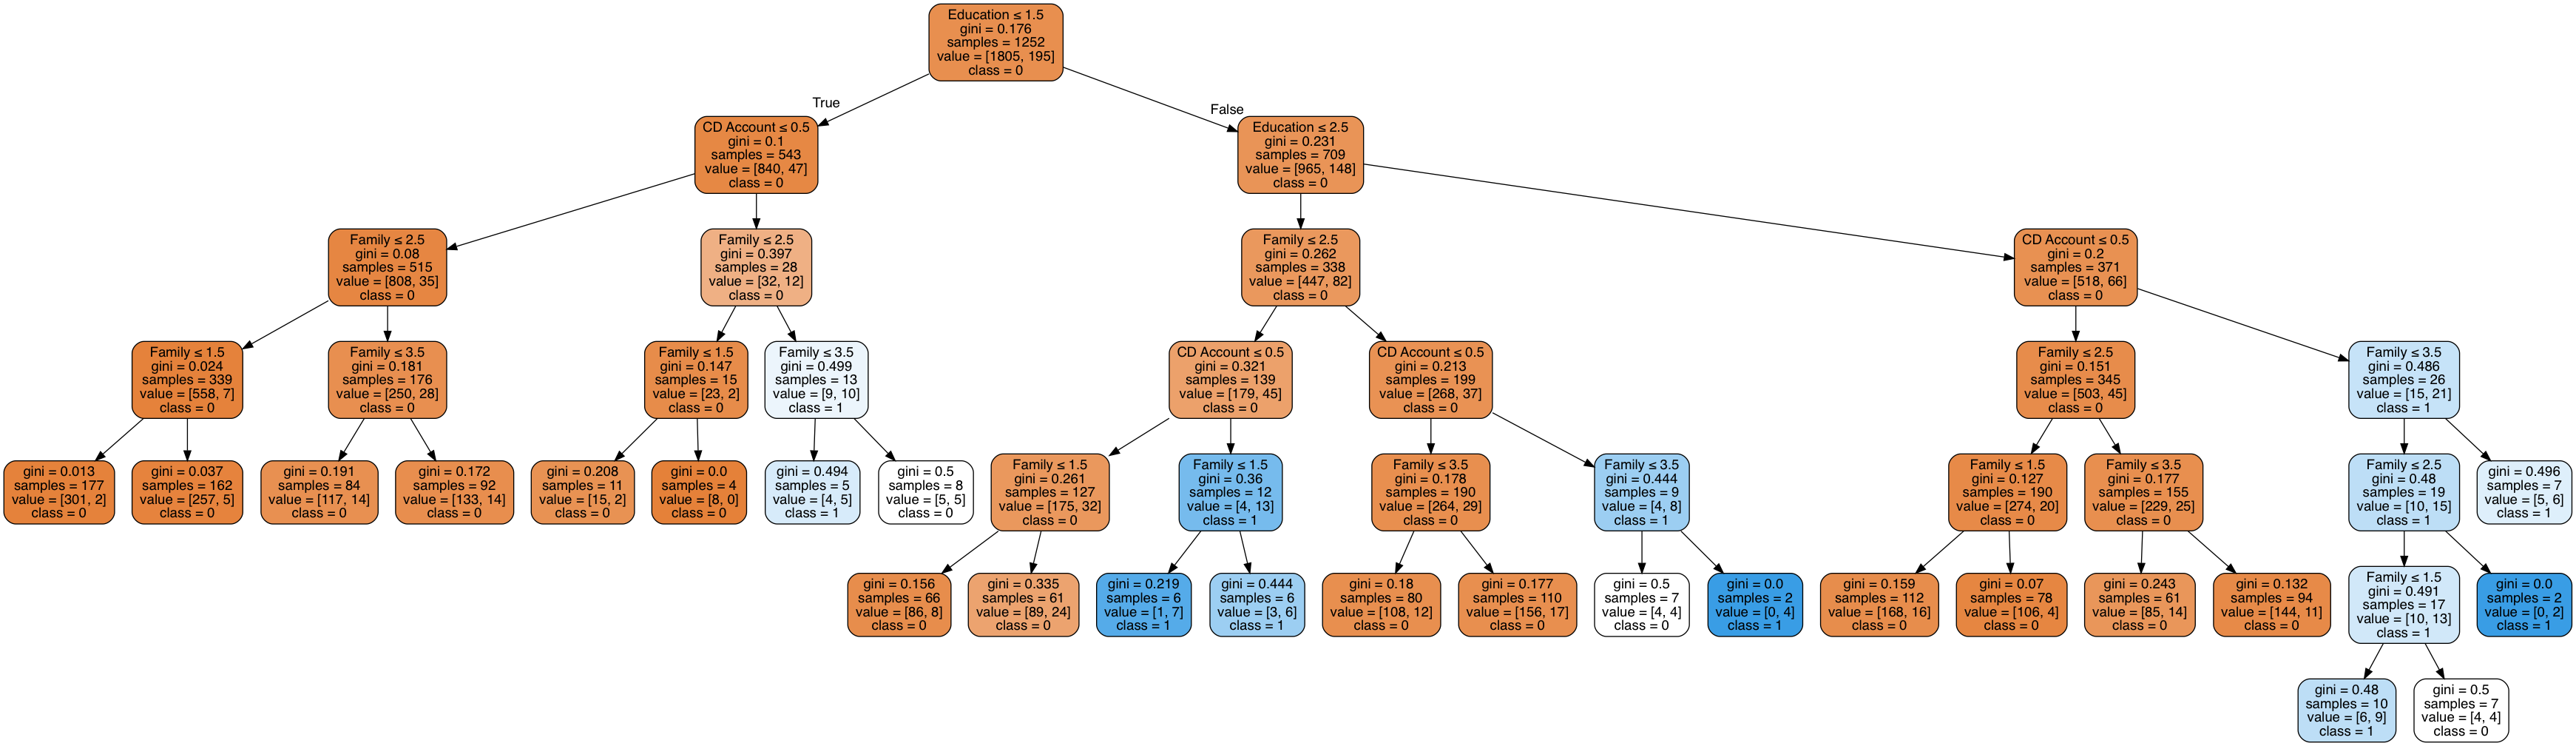

In [938]:
dot_data = StringIO()

estimator = model.estimators_[0]

export_graphviz(estimator, out_file=dot_data,  feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Tree 02

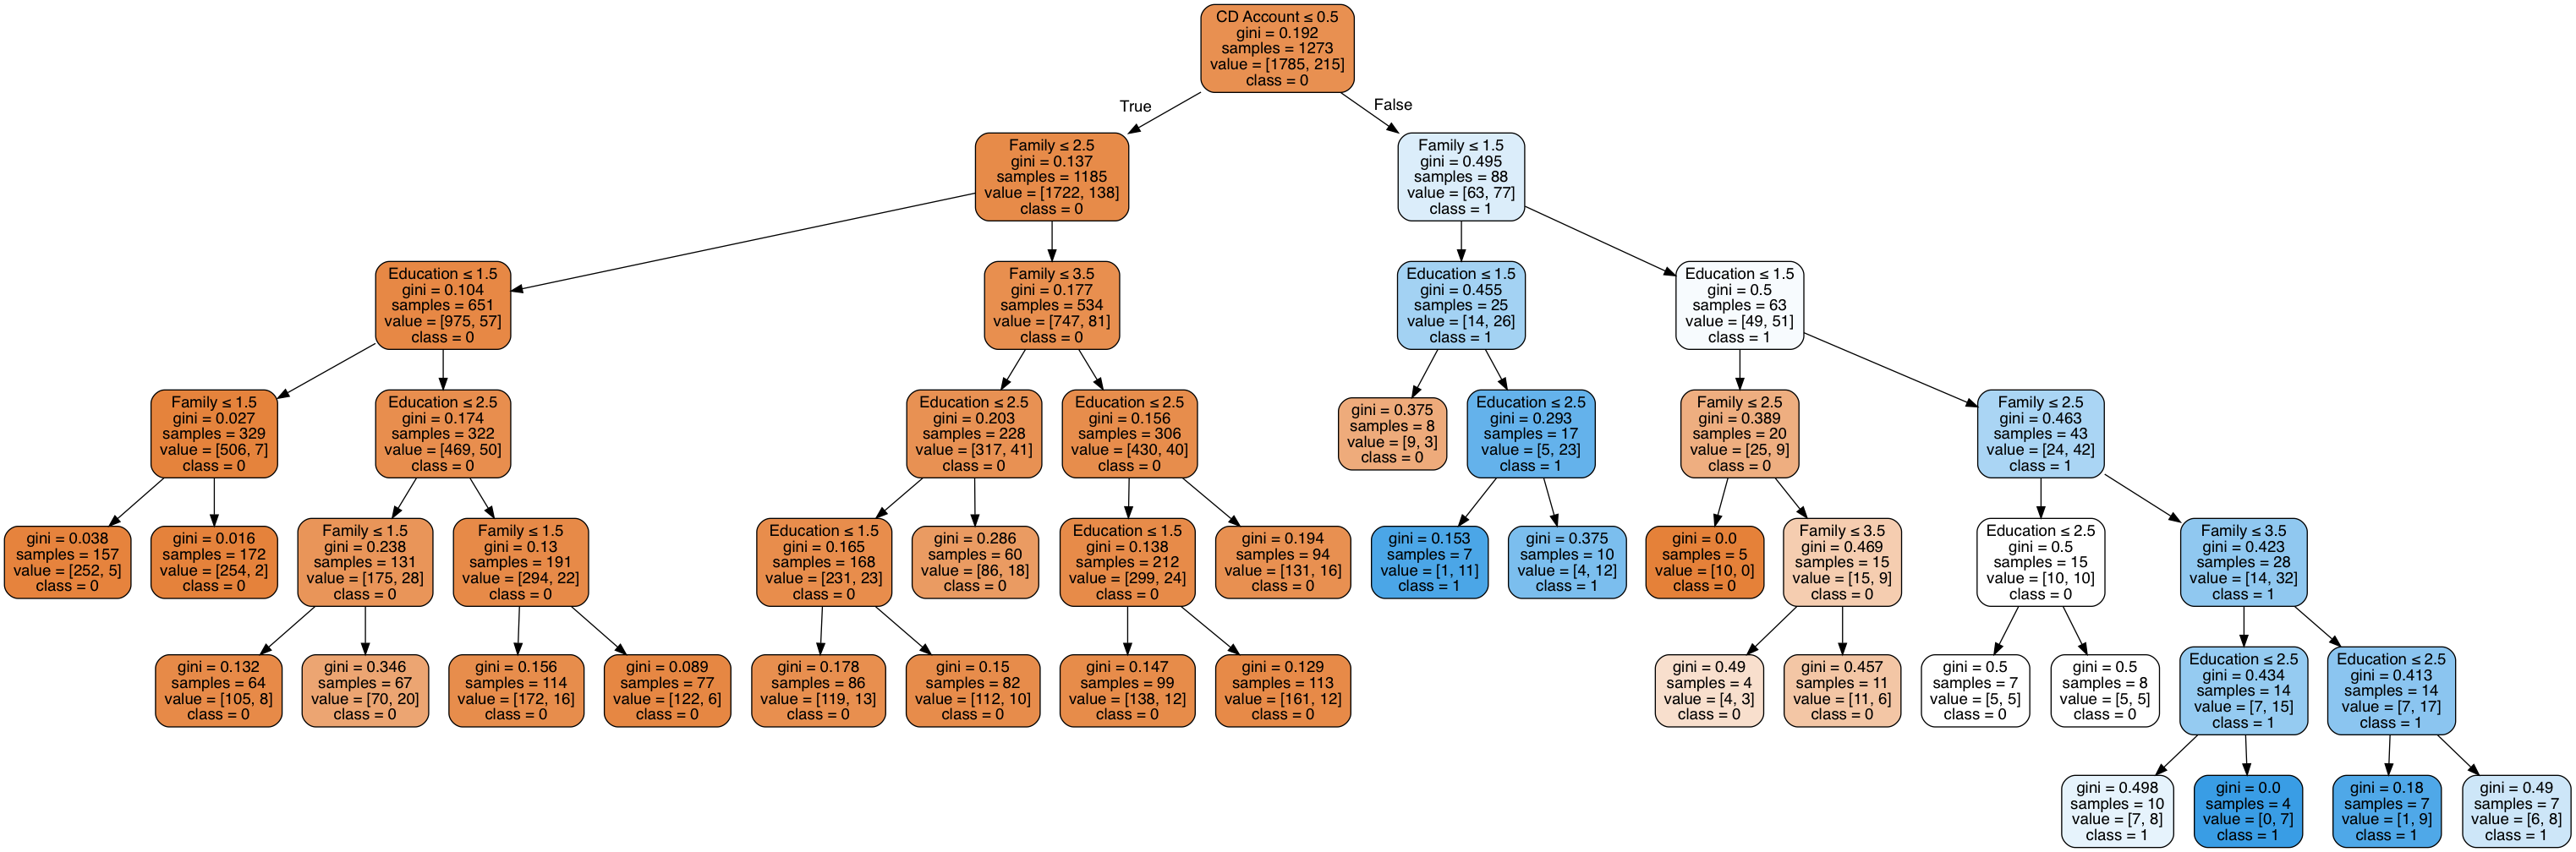

In [939]:
dot_data = StringIO()
estimator = model.estimators_[1]

export_graphviz(estimator, out_file=dot_data,  feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Tree 03

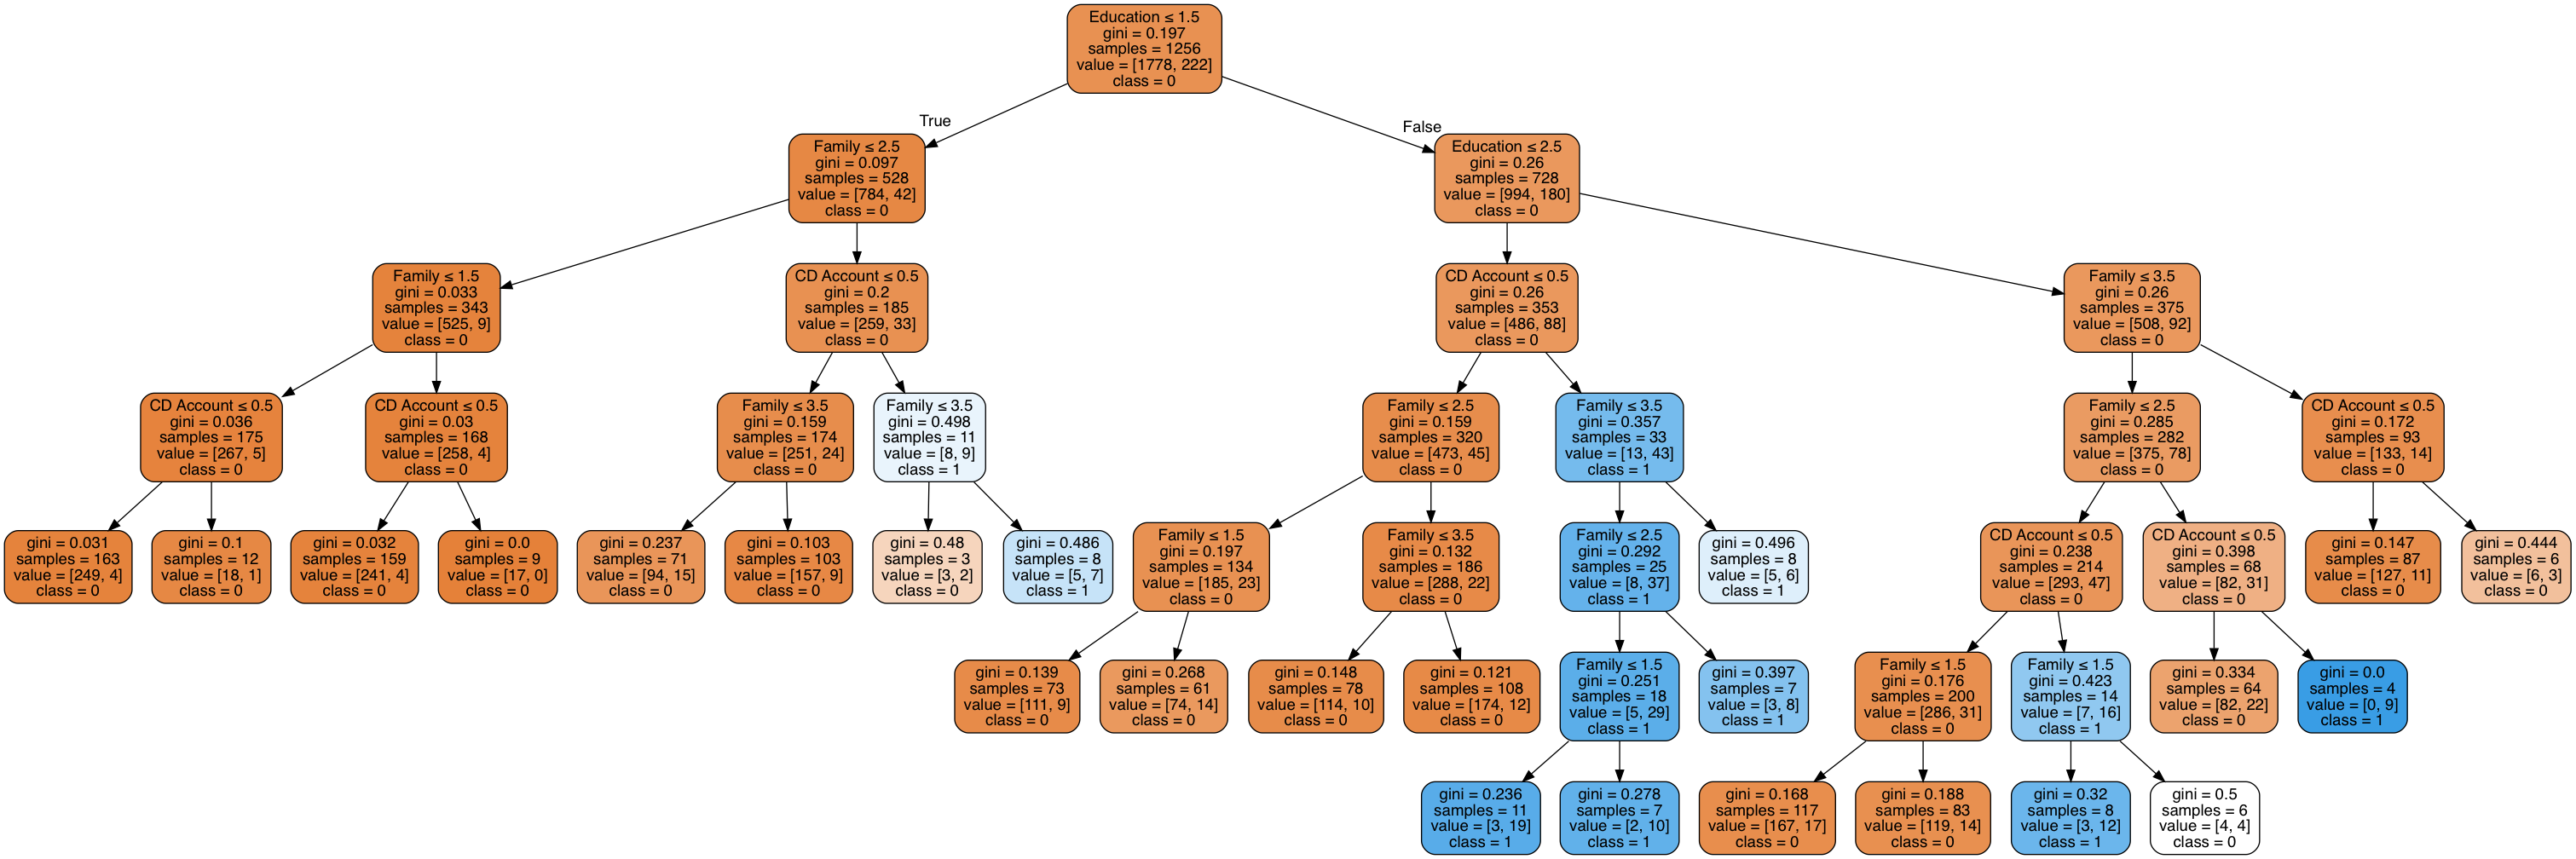

In [940]:
dot_data = StringIO()
estimator = model.estimators_[2]

export_graphviz(estimator, out_file=dot_data,  feature_names = X.columns, class_names = ['0','1'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [941]:
model_stats_df = pd.DataFrame(model_stats)
model_stats_df

,model,accuracy
0,Logistic Regression,0.940
1,KNN,0.908
2,Decision Tree,0.910
3,Random Forest,0.916


### Features

- Logistic Regression
- K-nearest Neighbors
```python
X = df[['Experience', 'Income', 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]
```

- Decision Tree
- Random Forest
```python
X = df[['Education', 'Family', 'CD Account']]
```